In [1]:
#In order to optimize our inventory, we would like to know which films 
#will be rented next month and we are asked to create a model to predict it.


# 1. Create a query or queries to extract the information you think may be relevant for building the prediction model. 
#It should include some film features and some rental features. 
 # DONE ON MYSQL

In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass 
import seaborn as sns
import matplotlib.pyplot as plt

password = getpass.getpass()

········


In [3]:
# 2. Read the data into a Pandas dataframe.

In [27]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
SELECT f.film_id, f.title, count(r.rental_id) as frequency, f.rating, f.special_features, f.rental_rate, f.replacement_cost,r.rental_date,month(r.rental_date), year(r.rental_date),
case 	
	when cast(month(r.rental_date) as float) = 2  AND cast(year(r.rental_date) as float) = 2006
    Then 'True'
	else 'False'
	end as 'Rented_02_2006'
FROM sakila.film f
JOIN sakila.inventory i USING (film_id)
JOIN sakila.rental r ON i.inventory_id = r.inventory_id
GROUP BY 1,8;

'''
data = pd.read_sql_query(query,engine)

In [28]:
data

,film_id,title,frequency,rating,special_features,rental_rate,replacement_cost,rental_date,month(r.rental_date),year(r.rental_date),Rented_02_2006
0,1,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes",0.99,20.99,2005-07-08 19:03:15,7,2005,False
1,1,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes",0.99,20.99,2005-08-02 20:13:10,8,2005,False
2,1,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes",0.99,20.99,2005-08-21 21:27:43,8,2005,False
3,1,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes",0.99,20.99,2005-05-30 20:21:07,5,2005,False
4,1,ACADEMY DINOSAUR,1,PG,"Deleted Scenes,Behind the Scenes",0.99,20.99,2005-06-17 20:24:00,6,2005,False
...,...,...,...,...,...,...,...,...,...,...,...
16025,1000,ZORRO ARK,1,NC-17,"Trailers,Commentaries,Behind the Scenes",4.99,18.99,2005-05-29 03:49:03,5,2005,False
16026,1000,ZORRO ARK,1,NC-17,"Trailers,Commentaries,Behind the Scenes",4.99,18.99,2005-06-15 21:50:32,6,2005,False
16027,1000,ZORRO ARK,1,NC-17,"Trailers,Commentaries,Behind the Scenes",4.99,18.99,2005-07-12 13:24:47,7,2005,False
16028,1000,ZORRO ARK,1,NC-17,"Trailers,Commentaries,Behind the Scenes",4.99,18.99,2005-07-31 07:32:21,7,2005,False


In [29]:
# 3. Analyze extracted features and transform them. 
# You may need to encode some categorical variables, or scale numerical variables.
data.dtypes


film_id                          int64
title                           object
frequency                        int64
rating                          object
special_features                object
rental_rate                    float64
replacement_cost               float64
rental_date             datetime64[ns]
month(r.rental_date)             int64
year(r.rental_date)              int64
Rented_02_2006                  object
dtype: object

In [30]:
data.isna().sum()

film_id                 0
title                   0
frequency               0
rating                  0
special_features        0
rental_rate             0
replacement_cost        0
rental_date             0
month(r.rental_date)    0
year(r.rental_date)     0
Rented_02_2006          0
dtype: int64

In [31]:
data=data.drop(['film_id'],axis=1)

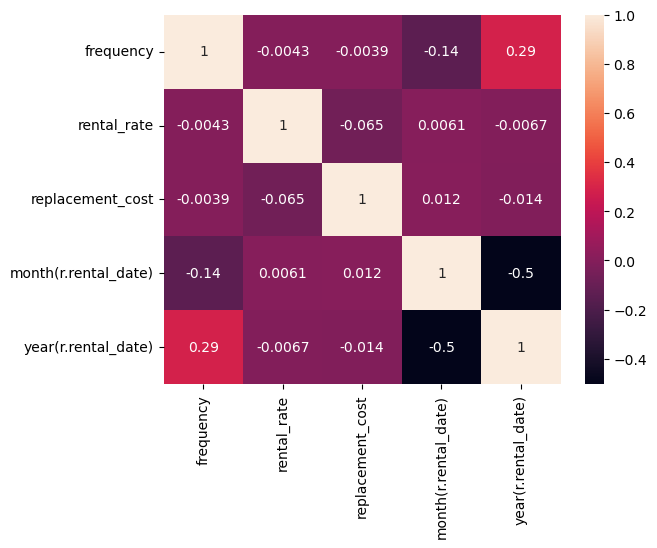

In [32]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

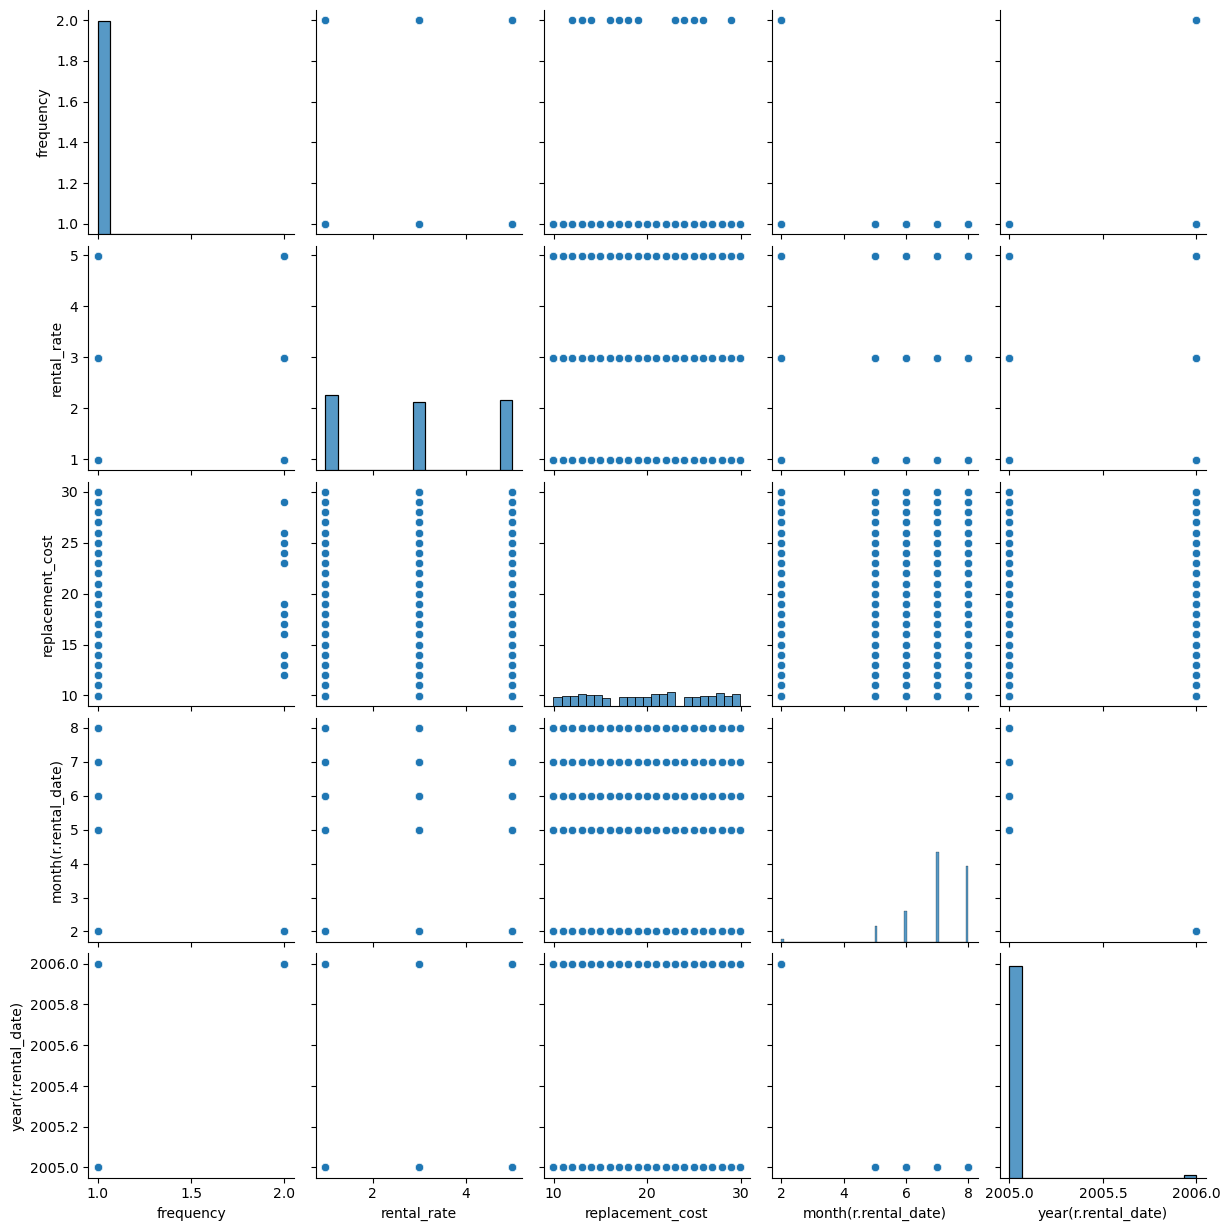

In [33]:
sns.pairplot(data)

In [34]:
import numpy as np
from sklearn.preprocessing import Normalizer

X = data.select_dtypes(include = np.number)
X.head()

,frequency,rental_rate,replacement_cost,month(r.rental_date),year(r.rental_date)
0,1,0.99,20.99,7,2005
1,1,0.99,20.99,8,2005
2,1,0.99,20.99,8,2005
3,1,0.99,20.99,5,2005
4,1,0.99,20.99,6,2005


In [35]:
cat = data.select_dtypes(include = np.object)
cat
cat = cat.drop(['title','Rented_02_2006'],axis=1)

/var/folders/tj/3p22v50d6ns8hpw1fn28jhmr0000gn/T/ipykernel_91560/1062137841.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = data.select_dtypes(include = np.object)


In [36]:
cat

,rating,special_features
0,PG,"Deleted Scenes,Behind the Scenes"
1,PG,"Deleted Scenes,Behind the Scenes"
2,PG,"Deleted Scenes,Behind the Scenes"
3,PG,"Deleted Scenes,Behind the Scenes"
4,PG,"Deleted Scenes,Behind the Scenes"
...,...,...
16025,NC-17,"Trailers,Commentaries,Behind the Scenes"
16026,NC-17,"Trailers,Commentaries,Behind the Scenes"
16027,NC-17,"Trailers,Commentaries,Behind the Scenes"
16028,NC-17,"Trailers,Commentaries,Behind the Scenes"


In [37]:
cat = pd.get_dummies(cat,columns=['rating','special_features']) 
cat

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Behind the Scenes,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16025,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16026,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16028,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
# 4. Create a query to get the list of films and a boolean indicating if it was rented last month. 
# This would be our target variable.



In [39]:
#data['rental_date'].max() 

In [40]:
# 4. Create a query to get the list of films and a boolean indicating if it was rented last month. 
# This would be our target variable.
#preY=pd.DataFrame(np.where([data['rental_date'].dt.strftime('%Y-%m')=='2005-05'], True, False)).T
#preY

#title=data['title'].unique

#Z = pd.concat((title,preY),axis=1)

#Z


In [41]:
# OR
#preY=pd.DataFrame(np.where([data['rental_date'].dt.strftime('%Y-%m')==data['rental_date'].max()], True, False)).T

In [42]:
#data['title'].unique()
#df = pd.DataFrame(data['title'].unique(), columns = ['title_name'])


In [43]:
#df

In [44]:
#Z = pd.concat((df,preY),axis=1)
#Z

In [45]:
#query2 = '''
#SELECT f.title, 
#FROM sakila.rental r
#JOIN sakila.inventory i USING (inventory_id)
#JOIN sakila.film f USING (film_id);

#'''
#prey = pd.read_sql_query(query2,engine)

#prey.head(50) #to confirm



In [46]:
import datetime as dt

data['rental_date'] = data['rental_date'].map(dt.datetime.toordinal)

In [47]:
X = X.drop(['month(r.rental_date)','year(r.rental_date)'], axis=1)


NameError: name 'preY' is not defined

In [51]:
# 5. Create a logistic regression model to predict this variable from the cleaned data.

X = np.concatenate((X,cat),axis=1)
Y = data['Rented_02_2006']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4)

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression().fit(X_train,Y_train)


/Users/diogocapitao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# 6. Evaluate the results.
predictions = classification.predict(X_test)
predictions


array(['False', 'False', 'False', ..., 'False', 'False', 'False'],
      dtype=object)

In [53]:
classification.score(X_test,Y_test)

0.9878353087960074